##Урок 8. Python применение статистических критериев на практике - пайплайн оценки A/B
###Домашнее задание
На сайте запущен А/В тест с целью увеличить доход. В приложенном excel файле вы найдете сырые данные по результатам эксперимента – user_id, тип выборки variant_name и доход принесенный пользователем revenue.
Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.


In [1]:
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

import numpy as np

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [6]:
df = pd.read_excel('AB_Test_Results .xlsx')
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [7]:
df.info

<bound method DataFrame.info of       USER_ID VARIANT_NAME  REVENUE
0         737      variant      0.0
1        2423      control      0.0
2        9411      control      0.0
3        7311      control      0.0
4        6174      variant      0.0
...       ...          ...      ...
9995     1981      control      0.0
9996      502      variant      0.0
9997     9214      variant      0.0
9998     7741      control      0.0
9999     9468      control      0.0

[10000 rows x 3 columns]>

In [27]:
df.shape

(10000, 3)

In [5]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [80]:
df.VARIANT_NAME.value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

In [29]:
df.isna().sum()

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

In [8]:
new_df = df[df['REVENUE'] > 0]
new_df

,USER_ID,VARIANT_NAME,REVENUE
13,2529,variant,2.15
49,6429,control,3.25
139,3331,variant,4.27
149,8110,variant,1.75
152,8607,control,2.99
...,...,...,...
9651,9928,variant,1.25
9711,6468,control,2.93
9724,5205,control,14.17
9725,702,variant,2.92


In [9]:
new_df[df['VARIANT_NAME']=='variant'].describe()

,USER_ID,REVENUE
count,72.000000,72.000000
mean,5306.958333,4.881528
std,3116.544256,9.913973
min,56.000000,0.020000
25%,2707.500000,1.245000
50%,5721.000000,2.170000
75%,7963.750000,3.972500
max,9996.000000,58.630000


In [10]:
new_df[df['VARIANT_NAME']=='control'].describe()

,USER_ID,REVENUE
count,80.000000,80.000000
mean,4461.950000,8.037500
std,2826.386242,22.498124
min,124.000000,0.020000
25%,2037.500000,1.515000
50%,4327.000000,2.960000
75%,6636.750000,6.657500
max,9766.000000,196.010000


In [28]:
new_df.shape

(152, 3)

Проверка нормальности распределения

In [34]:
alpha = 0.05

st = shapiro(df.REVENUE)
print('Discription is {}normal\n'.format( {True: 'not ',
False: ''}[st[1] < alpha]));

Discription is not normal



In [95]:
df.VARIANT_NAME.value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

In [96]:
new_df.VARIANT_NAME.value_counts()

control    80
variant    72
Name: VARIANT_NAME, dtype: int64

 График дохода на юзера по группам

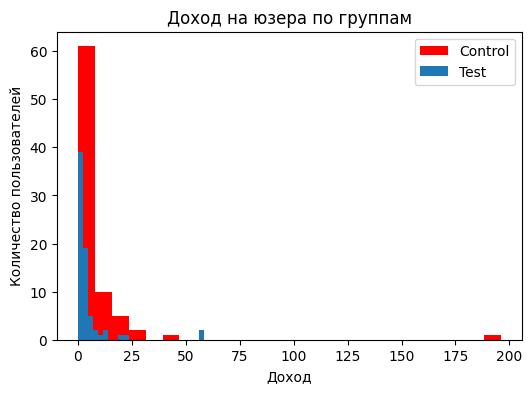

In [21]:
plt.figure(figsize=(6, 4))
control = new_df['REVENUE'][df['VARIANT_NAME']=='control']
test = new_df['REVENUE'][df['VARIANT_NAME']=='variant']

plt.hist(control, color='r', bins=25,label = 'Control')
plt.hist(test, bins=25,label = 'Test')
plt.title('Доход на юзера по группам')
plt.xlabel('Доход')
plt.ylabel('Количество пользователей')
plt.legend();

Боксплот по пользователям

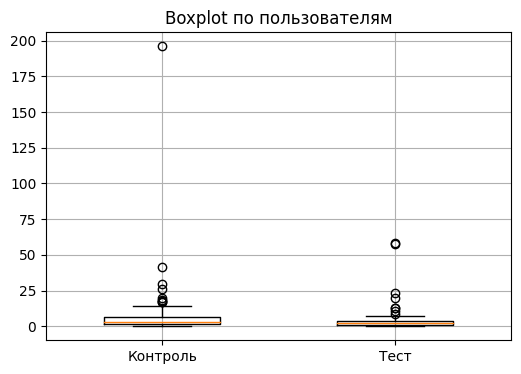

In [22]:
plt.figure(figsize=(6, 4))
plt.boxplot([control, test],
            labels = ['Контроль', 'Тест'],
            widths = 0.5
            )
plt.title('Boxplot по пользователям', loc='center')
plt.grid(axis='both')

In [24]:
ttest_ind(control, test, equal_var = False)

Ttest_indResult(statistic=1.1379124979933528, pvalue=0.2576068539893233)

In [25]:
mannwhitneyu(control, test)

MannwhitneyuResult(statistic=3356.0, pvalue=0.07924299810603061)

pvalue > 0.05

Таким образом, статистически значимых различий нет. На доход от юзеров в экспериментальной группе, введенные изменения не повлияли. Запускать  проект не стоит. Возможно, тест проведен был некорректно. Можно порекомендовать провести тест повторно на большем количестве юзеров.